In [ ]:
!pip install gTTS

In [12]:
# Import the required module for text to speech conversion
from gtts import gTTS

In [13]:
# This module is imported so that we can play the converted audio
import os

In [14]:
# The text that you want to convert to audio
mytext = 'राकेश अस्थानांच्या नियुक्तीमुळे मोदी-शाह यांचा पोलीस व्यवस्था उद्ध्वस्त करण्याचा मानस उघड'

In [15]:
# Language in which you want to convert
language = 'mr'

In [16]:
# Passing the text and language to the engine, here we have marked slow=False. Which tells
# the module that the converted audio should have a high speed
myobj = gTTS(text=mytext, lang=language, slow=False , tld='co.in')

In [17]:
# Saving the converted audio in a mp3 file named
myobj.save("marathi.mp3")

In [19]:
os.system("marathi.mp3")

0

**Text detection with Tesseract OCR**

In [55]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [56]:
!pip install pytesseract

In [1]:
 # importing modules
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe' 

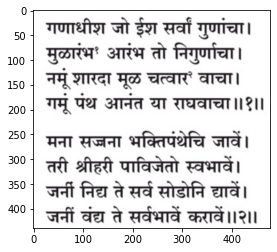

In [2]:
# reading image using opencv
InputImage = cv2.imread('ManShok1.PNG')
plt.imshow(InputImage)
plt.show()

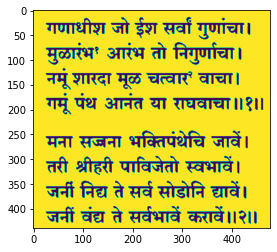

In [3]:
#converting image into gray scale image
gray_image = cv2.cvtColor(InputImage, cv2.COLOR_BGR2GRAY)

# converting it to binary image by Thresholding this step is require if you have colored image because if you skip this part
# then tesseract won't able to detect text correctly and this will give incorrect result

threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# display image
plt.imshow(threshold_img)
plt.show()


In [4]:
bounded = InputImage.copy()
res = np.zeros_like(gray_image)

h, w = InputImage.shape[:2]

boxes = pytesseract.image_to_boxes(InputImage,lang='mar')
boxes = [map(int, i) for i in [b.split(" ")[1:-1] for b in boxes.split("\n")]]

for box in boxes:
    box = list(box)
    min4pts = len(box)
    if (min4pts >= 4):
        b = (int(box[0]), int(h - box[1]), int(box[2]), int(h - box[3]))
        cv2.rectangle(bounded, (b[0], b[1]), (b[2], b[3]), (0, 255, 0), 2)
        cv2.rectangle(res, (b[0], b[1]), (b[2], b[3]), 255, -1)

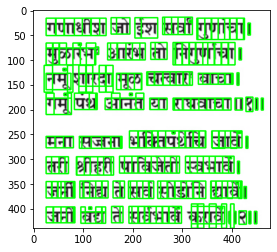

In [5]:
plt.imshow(bounded)
plt.show()

In [9]:
#configuring parameters for tesseract
custom_config = r'--oem 1 --psm 4 --dpi 300'

# now feeding image to tesseract
details = pytesseract.image_to_string(threshold_img, config=custom_config, lang='mar')

In [11]:
details

"गणाधीश जो ईश सर्वा गुणांचा।\nमुळारंभ' आरंभ तो निगुर्णाचा।\nनमूं शारदा मूळ चत्वार* वाचा ।\nगमूं पंथ आनंत या राघवाचा ॥१॥\n\nमना सजना भक्तिपंथेचि जावें।\nतरी श्रीहरी पाविजेतो स्वभावें ।\nजर्नी निद्य ते सर्व सोडोनि द्यावें।\nजनीं वंद्य ते सर्वभावे करावें ॥॥२॥\n\x0c"

## Combine Both Codes

In [23]:
myobj = gTTS(text=details, lang=language, slow=False , tld='co.in')

In [24]:
# Saving the converted audio in a mp3 file named
myobj.save("ManS.mp3")

In [25]:
os.system("ManS.mp3")

0